# It is the field for experiments on our capstone project

I just copy pasted it from the repo pandas.

In [75]:
import matplotlib.pyplot as plt # Imports the plotting interface and creates the common alias 'plt'
import numpy as np # we will use numpy to generate the data used in our sample charts
import pandas as pd
import seaborn as sns
%matplotlib inline

In [76]:
# read csv files; all dataframes same shape (266, 7)
dax = pd.read_csv("data/dax.csv", sep = ",") # separator sep = "," by default. do not mess up with replace-function ("", "")
spx = pd.read_csv("data/spx.csv", sep = ",")
sse = pd.read_csv("data/sse.csv", sep = ",")
nikkei = pd.read_csv("data/nikkei.csv", sep = ",")
eur_usd = pd.read_csv("data/eur_usd.csv", sep = ",")# first date - 02/01/2024 (MM/DD/YYYY); last date (index 265) - 01/01/2002; dtype: object
cny_usd = pd.read_csv("data/cny_usd.csv", sep = ",") # first date - 2002-01-01 (YYYY-MM-DD); last date (index 265) - 2024-02-01; dtype: object
jpy_usd = pd.read_csv("data/jpy_usd.csv", sep = ",")  # first date - 2002-01-01; last date (index 265) - 2024-02-01; dtype: object

In [77]:
# making copy of all dataframes
dax_copy = dax.copy() #first date (index 0) - 2002-01-01; last date (index 265) - 2024-02-01; dtype: object
spx_copy = spx.copy() #first date (index 0) - 2002-01-01; last date (index 265) - 2024-02-01; dtype: object
sse_copy = sse.copy() #first date (index 0) - 2002-01-01; last date (index 265) - 2024-02-01; dtype: object
nikkei_copy = nikkei.copy() #first date (index 0) - 2002-01-01; last date (index 265) - 2024-02-01; dtype: object
eur_usd_copy = eur_usd.copy() # first date (index 0) - 02/01/2024; last date (index 265) - 01/01/2002; dtype: object
cny_usd_copy = cny_usd.copy() # first date (index 0) - 2002-01-01; last date (index 265) - 2024-02-01; dtype: object
jpy_usd_copy = jpy_usd.copy() # first date (index 0) - 2002-01-01; last date (index 265) - 2024-02-01; dtype: object

In [78]:
# dropping columns
dax_copy.columns # Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
spx_copy.columns # Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
sse_copy.columns # Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nikkei_copy.columns # Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
eur_usd_copy.columns # Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
cny_usd_copy.columns # Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
jpy_usd_copy.columns # Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
dax_copy.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)
spx_copy.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)
sse_copy.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)
nikkei_copy.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)
eur_usd_copy.drop(['Price', 'High', 'Low', 'Vol.', 'Change %'], axis = 1, inplace=True)
cny_usd_copy.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)
jpy_usd_copy.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis = 1, inplace=True)

In [80]:
# convert datetime
dax_copy['Date'] = pd.to_datetime(dax_copy['Date'], format='%Y-%m-%d') 
spx_copy['Date'] = pd.to_datetime(spx_copy['Date'], format='%Y-%m-%d') 
sse_copy['Date'] = pd.to_datetime(sse_copy['Date'], format='%Y-%m-%d') 
nikkei_copy['Date'] = pd.to_datetime(nikkei_copy['Date'], format='%Y-%m-%d') 
eur_usd_copy['Date'] = pd.to_datetime(eur_usd_copy['Date'], format='%m/%d/%Y')
cny_usd_copy['Date'] = pd.to_datetime(cny_usd_copy['Date'], format='%Y-%m-%d') 
jpy_usd_copy['Date'] = pd.to_datetime(jpy_usd_copy['Date'], format='%Y-%m-%d') 
# sort values from past until now
eur_usd_copy.sort_values(by = 'Date', inplace=True) # Sort the DataFrame based on the datetime column in ascending order
eur_usd_copy.reset_index(drop=True, inplace=True) # Reset the index to ensure it reflects the new sorted order

In [83]:
# rename columns
dax_points = dax_copy.rename(columns = {'Date':'date','Open':'dax_price_open_points'}) 
spx_points = spx_copy.rename(columns = {'Date':'date','Open':'spx_price_open_points'}) 
sse_points = sse_copy.rename(columns = {'Date':'date','Open':'sse_price_open_points'}) 
nikkei_points = nikkei_copy.rename(columns = {'Date':'date','Open':'nikkei_price_open_points'}) 
eur_to_usd = eur_usd_copy.rename(columns = {'Date':'date','Open':'exchange_open_eur_to_usd'})
cny_to_usd = cny_usd_copy.rename(columns = {'Date':'date','Open':'exchange_open_cny_to_usd'}) 
jpy_to_usd = jpy_usd_copy.rename(columns = {'Date':'date','Open':'exchange_open_jpy_to_usd'}) 

In [91]:
#GDP complete
gdp = pd.read_csv("data/gdp_2.csv", sep = ",", skiprows=[0,1,2,3]) # 4 rows are labels of the dataframe, we dont need them

# gdp data cleaning; drop columns; data since 2002
gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code','1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', 'Unnamed: 67'], axis=1, inplace=True)
#gdp data cleaning; drop rows; data for China, USA, Germany, Japan
intervals_to_drop = [(0, 40), (41, 55), (56, 119), (120, 251), (252, 267)] # Define the intervals to drop
remaining_slices = [] # Create a list to hold the slices of DataFrame after dropping intervals
prev_end = 0 # Set the end of the previous slice
for start, end in intervals_to_drop: # Iterate through each interval
    # Slice the DataFrame to exclude the specified interval
    remaining_slices.append(gdp.iloc[prev_end:start])
    prev_end = end
remaining_slices.append(gdp.iloc[prev_end:]) # Append the remaining part of the DataFrame after the last interval
gdp_final = pd.concat(remaining_slices)# Concatenate the remaining slices to get the final DataFrame

gdp_final.reset_index(drop=True, inplace=True) # If you want to reset the index of the final DataFrame, you can use:
#The `drop=True` parameter in `reset_index` ensures that the old index is dropped and not added as a column.

In [92]:
gdp_final

,Country Name,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,China,1.470558e+12,1.660281e+12,1.955347e+12,2.285961e+12,2.752119e+12,3.550328e+12,4.594337e+12,5.101691e+12,6.087192e+12,...,9.570471e+12,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.796317e+13
1,Germany,2.078485e+12,2.501640e+12,2.814354e+12,2.846864e+12,2.994704e+12,3.425578e+12,3.745264e+12,3.411261e+12,3.399668e+12,...,3.733805e+12,3.889093e+12,3.357586e+12,3.469853e+12,3.690849e+12,3.974443e+12,3.889178e+12,3.887727e+12,4.278504e+12,4.082469e+12
2,Japan,4.182846e+12,4.519562e+12,4.893116e+12,4.831467e+12,4.601663e+12,4.579751e+12,5.106679e+12,5.289493e+12,5.759072e+12,...,5.212328e+12,4.896994e+12,4.444931e+12,5.003678e+12,4.930837e+12,5.040881e+12,5.117994e+12,5.048790e+12,5.005537e+12,4.232174e+12
3,United States,1.092911e+13,1.145644e+13,1.221719e+13,1.303920e+13,1.381559e+13,1.447423e+13,1.476986e+13,1.447806e+13,1.504896e+13,...,1.684319e+13,1.755068e+13,1.820602e+13,1.869511e+13,1.947734e+13,2.053306e+13,2.138098e+13,2.106047e+13,2.331508e+13,2.543970e+13


In [130]:
# modify gdp dataframe; collumns to rows, rows to columns
gdp_trans = gdp_final.transpose()
#gdp_trans.columns # Index([40, 55, 119, 251], dtype='int64')
gdp_trans.rename(columns = {0:'china_gdp_current_usd', 1:'germany_gdp_current_usd', 2:'japan_gdp_current_usd', 3:'usa_gdp_current_usd'}, 
                 inplace=True)
gdp_trans.drop('Country Name', axis=0, inplace=True) # years are values (object) without columns name; no index
gdp_trans.reset_index(inplace=True) # now we have years with a column name "index" and all rows got an index
gdp_trans.columns # ['index', 'china_gdp_current_usd', 'germany_gdp_current_usd', 'japan_gdp_current_usd', 'usa_gdp_current_usd'],='object')
gdp_trans.rename(columns = {'index':'year'}, inplace=True)
gdp_trans['year'] = pd.to_numeric(gdp_trans['year'], errors='coerce').astype(int)
print(gdp_trans['year'].dtype)
gdp_trans

int64


,year,china_gdp_current_usd,germany_gdp_current_usd,japan_gdp_current_usd,usa_gdp_current_usd
0,2002,1470557654824.110107,2078484517474.51001,4182846045873.609863,10929112955000.0
1,2003,1660280543870.949951,2501640388482.350098,4519561645253.530273,11456442041000.0
2,2004,1955346768757.639893,2814353869359.080078,4893116005656.55957,12217193198000.0
3,2005,2285961149904.259766,2846864211175.100098,4831467035389.799805,13039199193000.0
4,2006,2752118657221.640137,2994703642023.529785,4601663122649.919922,13815586948000.0
5,2007,3550327803024.689941,3425578382921.580078,4579750920354.80957,14474226905000.0
6,2008,4594336785752.05957,3745264093617.189941,5106679115127.299805,14769857911000.0
7,2009,5101691124358.410156,3411261212652.339844,5289493117993.889648,14478064934000.0
8,2010,6087191746738.570312,3399667820000.009766,5759071769013.110352,15048964444000.0
9,2011,7551545703518.139648,3749314991050.589844,6233147172341.349609,15599728123000.0


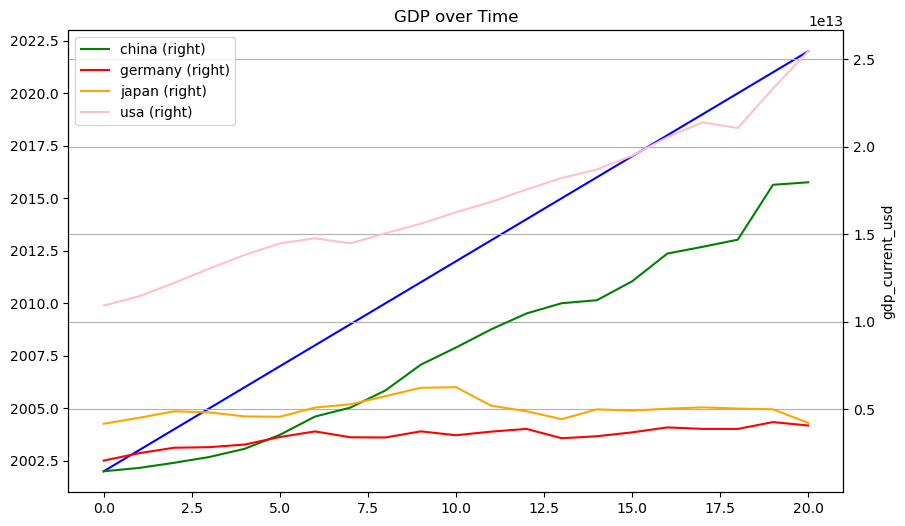

In [132]:
ax = gdp_trans['year'].plot(color='blue', figsize=(10, 6), label='year')
gdp_trans['china_gdp_current_usd'].plot(secondary_y=True, color='green', label='china', ax=ax)
gdp_trans['germany_gdp_current_usd'].plot(secondary_y=True, color='red', label='germany', ax=ax)
gdp_trans['japan_gdp_current_usd'].plot(secondary_y=True, color='orange', label='japan', ax=ax)
gdp_trans['usa_gdp_current_usd'].plot(secondary_y=True, color='pink', label='usa', ax=ax)


plt.title('GDP over Time')
plt.xlabel('Year')
plt.ylabel('gdp_current_usd')
plt.grid(True)
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [133]:
df_melted = pd.melt(gdp_trans,id_vars=['year'],var_name='country',value_name='gdp')
df_melted

,year,country,gdp
0,2002,china_gdp_current_usd,1470557654824.110107
1,2003,china_gdp_current_usd,1660280543870.949951
2,2004,china_gdp_current_usd,1955346768757.639893
3,2005,china_gdp_current_usd,2285961149904.259766
4,2006,china_gdp_current_usd,2752118657221.640137
...,...,...,...
79,2018,usa_gdp_current_usd,20533057312000.0
80,2019,usa_gdp_current_usd,21380976119000.0
81,2020,usa_gdp_current_usd,21060473613000.0
82,2021,usa_gdp_current_usd,23315080560000.0


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

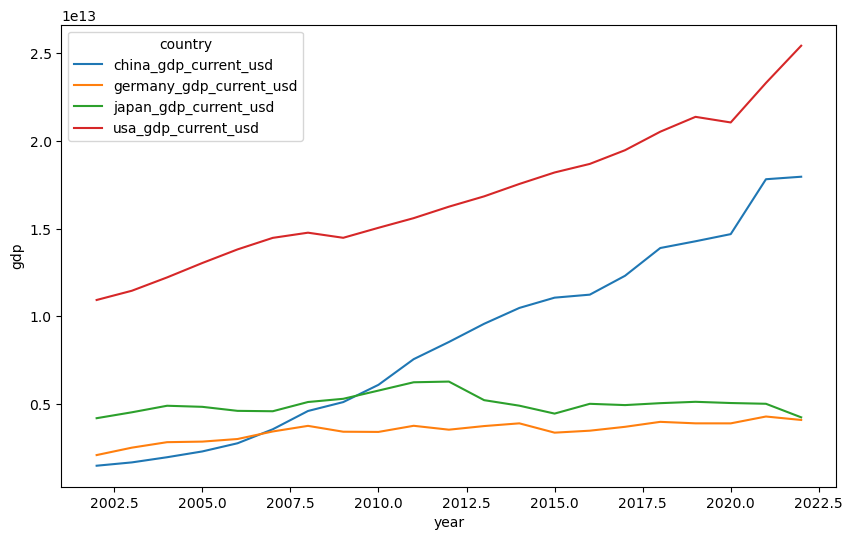

In [134]:
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='gdp', hue='country', data=df_melted)
plt.xlabel('year')
plt.ylabel('gdp')
plt.legend(title='country')
plt.show()

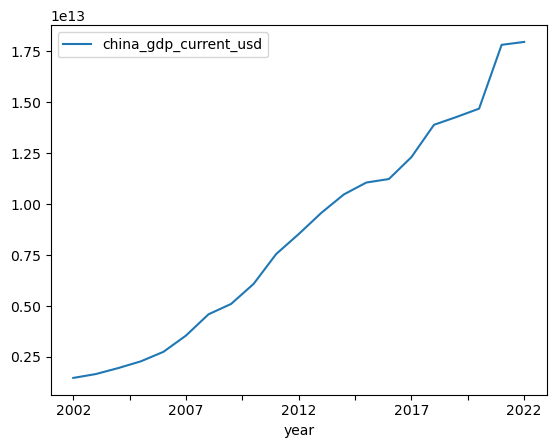

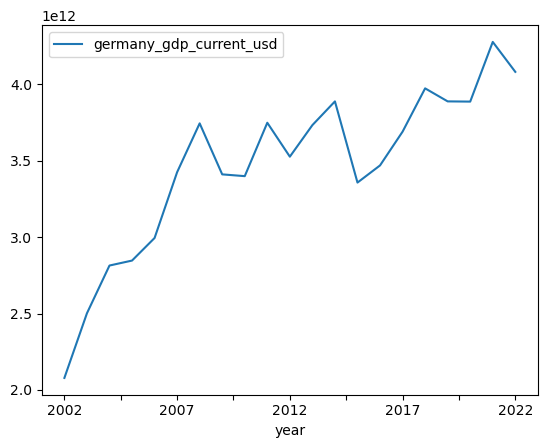

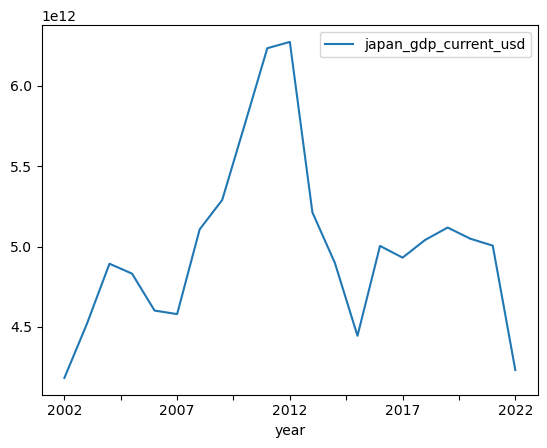

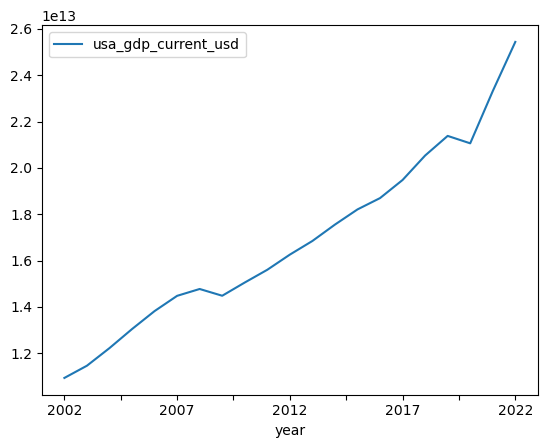

In [116]:
gdp_china = gdp_trans.plot(x='year', y='china_gdp_current_usd'); # plot china gdp
gdp_germany = gdp_trans.plot(x='year', y='germany_gdp_current_usd'); # plot germany gdp
gdp_japan = gdp_trans.plot(x='year', y='japan_gdp_current_usd'); # plot japan gdp
gdp_usa = gdp_trans.plot(x='year', y='usa_gdp_current_usd'); # plot usa gdp